In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
# Reads the data

df = pd.read_csv("./heart_data.csv")

# Displays only the first few rows of the dataset

print(df.head())

# Computes the number of rows and columns of the dataset

rows = len(df.axes[0])
cols = len(df.axes[1])

print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

# Prints the types of each of the variables in the dataset

print(df.dtypes)

# Counts the number of each datatypes in the dataset

print(df.dtypes.value_counts())

# Calculates the statistical description of the data

print(df.describe())

# Prints the information of the variables of the dataset

print(df.info())

   index  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0  18393       2     168    62.0    110     80            1     1   
1      1   1  20228       1     156    85.0    140     90            3     1   
2      2   2  18857       1     165    64.0    130     70            3     1   
3      3   3  17623       2     169    82.0    150    100            1     1   
4      4   4  17474       1     156    56.0    100     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  
Number of Rows:  70000
Number of Columns:  14
index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64

In [6]:
df['gender'] = df['gender'].replace({1: 0, 2: 1})

# Describes a variable in terms of another variable

print(df.groupby('gender').height.describe())

# Since the average of height of men is more than women,
# 1 : 0 represents women
# 2 : 1 represents men

          count        mean       std   min    25%    50%    75%    max
gender                                                                 
0       45530.0  161.355612  7.052726  55.0  157.0  161.0  166.0  250.0
1       24470.0  169.947895  7.228895  65.0  165.0  170.0  175.0  207.0


In [7]:
# Calculates the number of unique outputs for each variable

print(df.nunique())

# True if there are missing value, False if there is not missing value

print(df.isnull())

# Calculates or sum up all the missing values

print(df.isnull().sum())

# True if there is duplicate, False if there is not
print(df.duplicated())

# Counts all the duplicates in the dataset

print(df.duplicated().sum())

# Counts the number of duplicates in id variable

print(df.id.duplicated().sum())

index          70000
id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64
       index     id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0      False  False  False   False   False   False  False  False        False   
1      False  False  False   False   False   False  False  False        False   
2      False  False  False   False   False   False  False  False        False   
3      False  False  False   False   False   False  False  False        False   
4      False  False  False   False   False   False  False  False        False   
...      ...    ...    ...     ...     ...     ...    ...    ...          ...   
69995  False  False  False   False   False   False  False  False        False   
69996  False  False  False   False   False   

In [8]:
# Removes index variable
print(df.drop('index', axis=1, inplace=True))

# Coverts days to years
# Assuming that age is in days, I converted it to years using the following equation

df['age'] = df['age'].apply(lambda x: x // 365)

print(df.head())

None
   id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       1     168    62.0    110     80            1     1      0   
1   1   55       0     156    85.0    140     90            3     1      0   
2   2   51       0     165    64.0    130     70            3     1      0   
3   3   48       1     169    82.0    150    100            1     1      0   
4   4   47       0     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [9]:
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

#different

train, test = train_test_split(df, test_size=0.3, random_state=0)

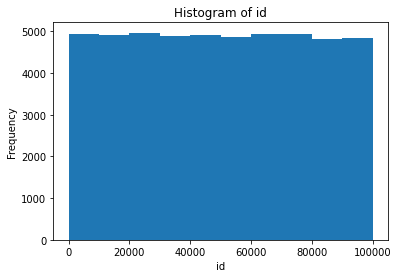

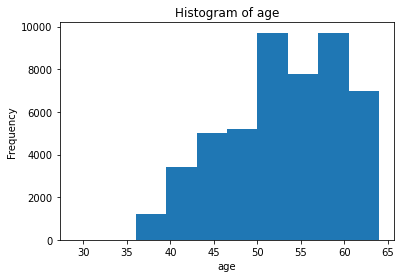

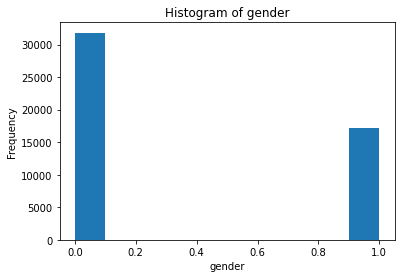

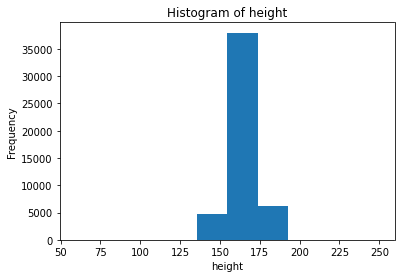

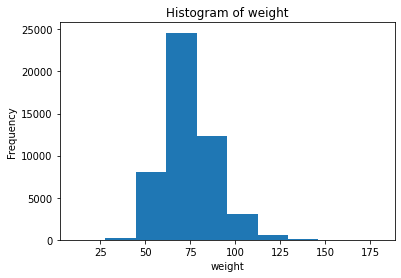

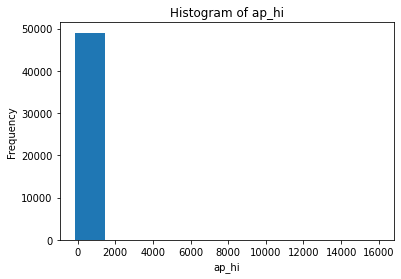

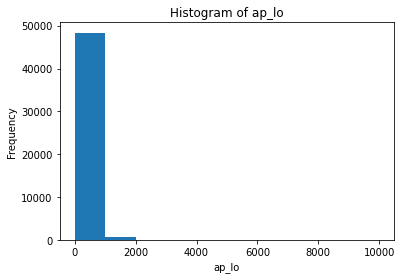

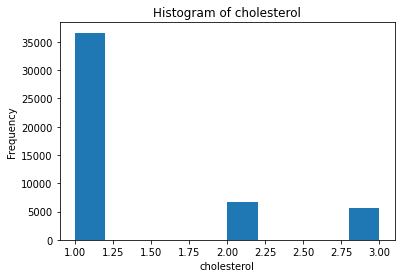

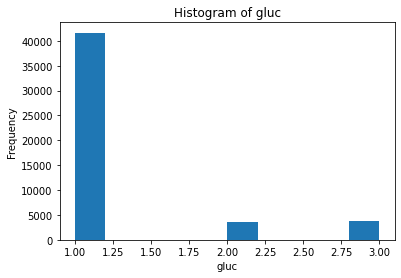

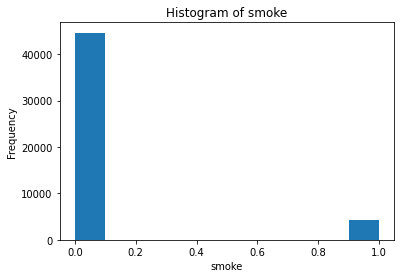

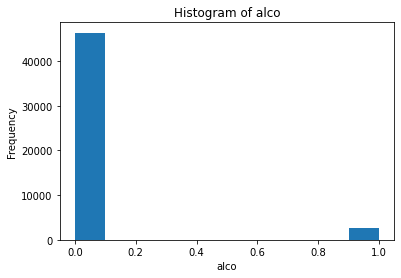

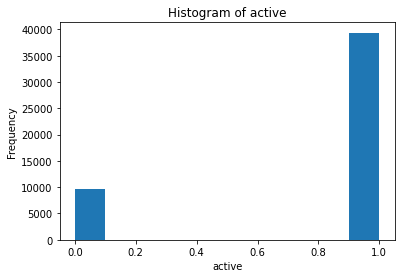

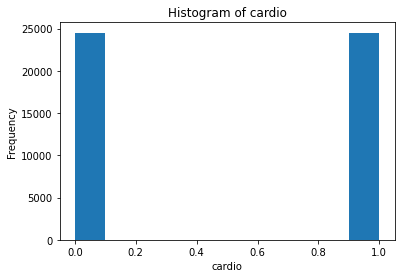

In [8]:
for column in train.columns:
    fig, ax = plt.subplots()
    ax.hist(train[column], bins=10)
    ax.set_title('Histogram of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plt.show()

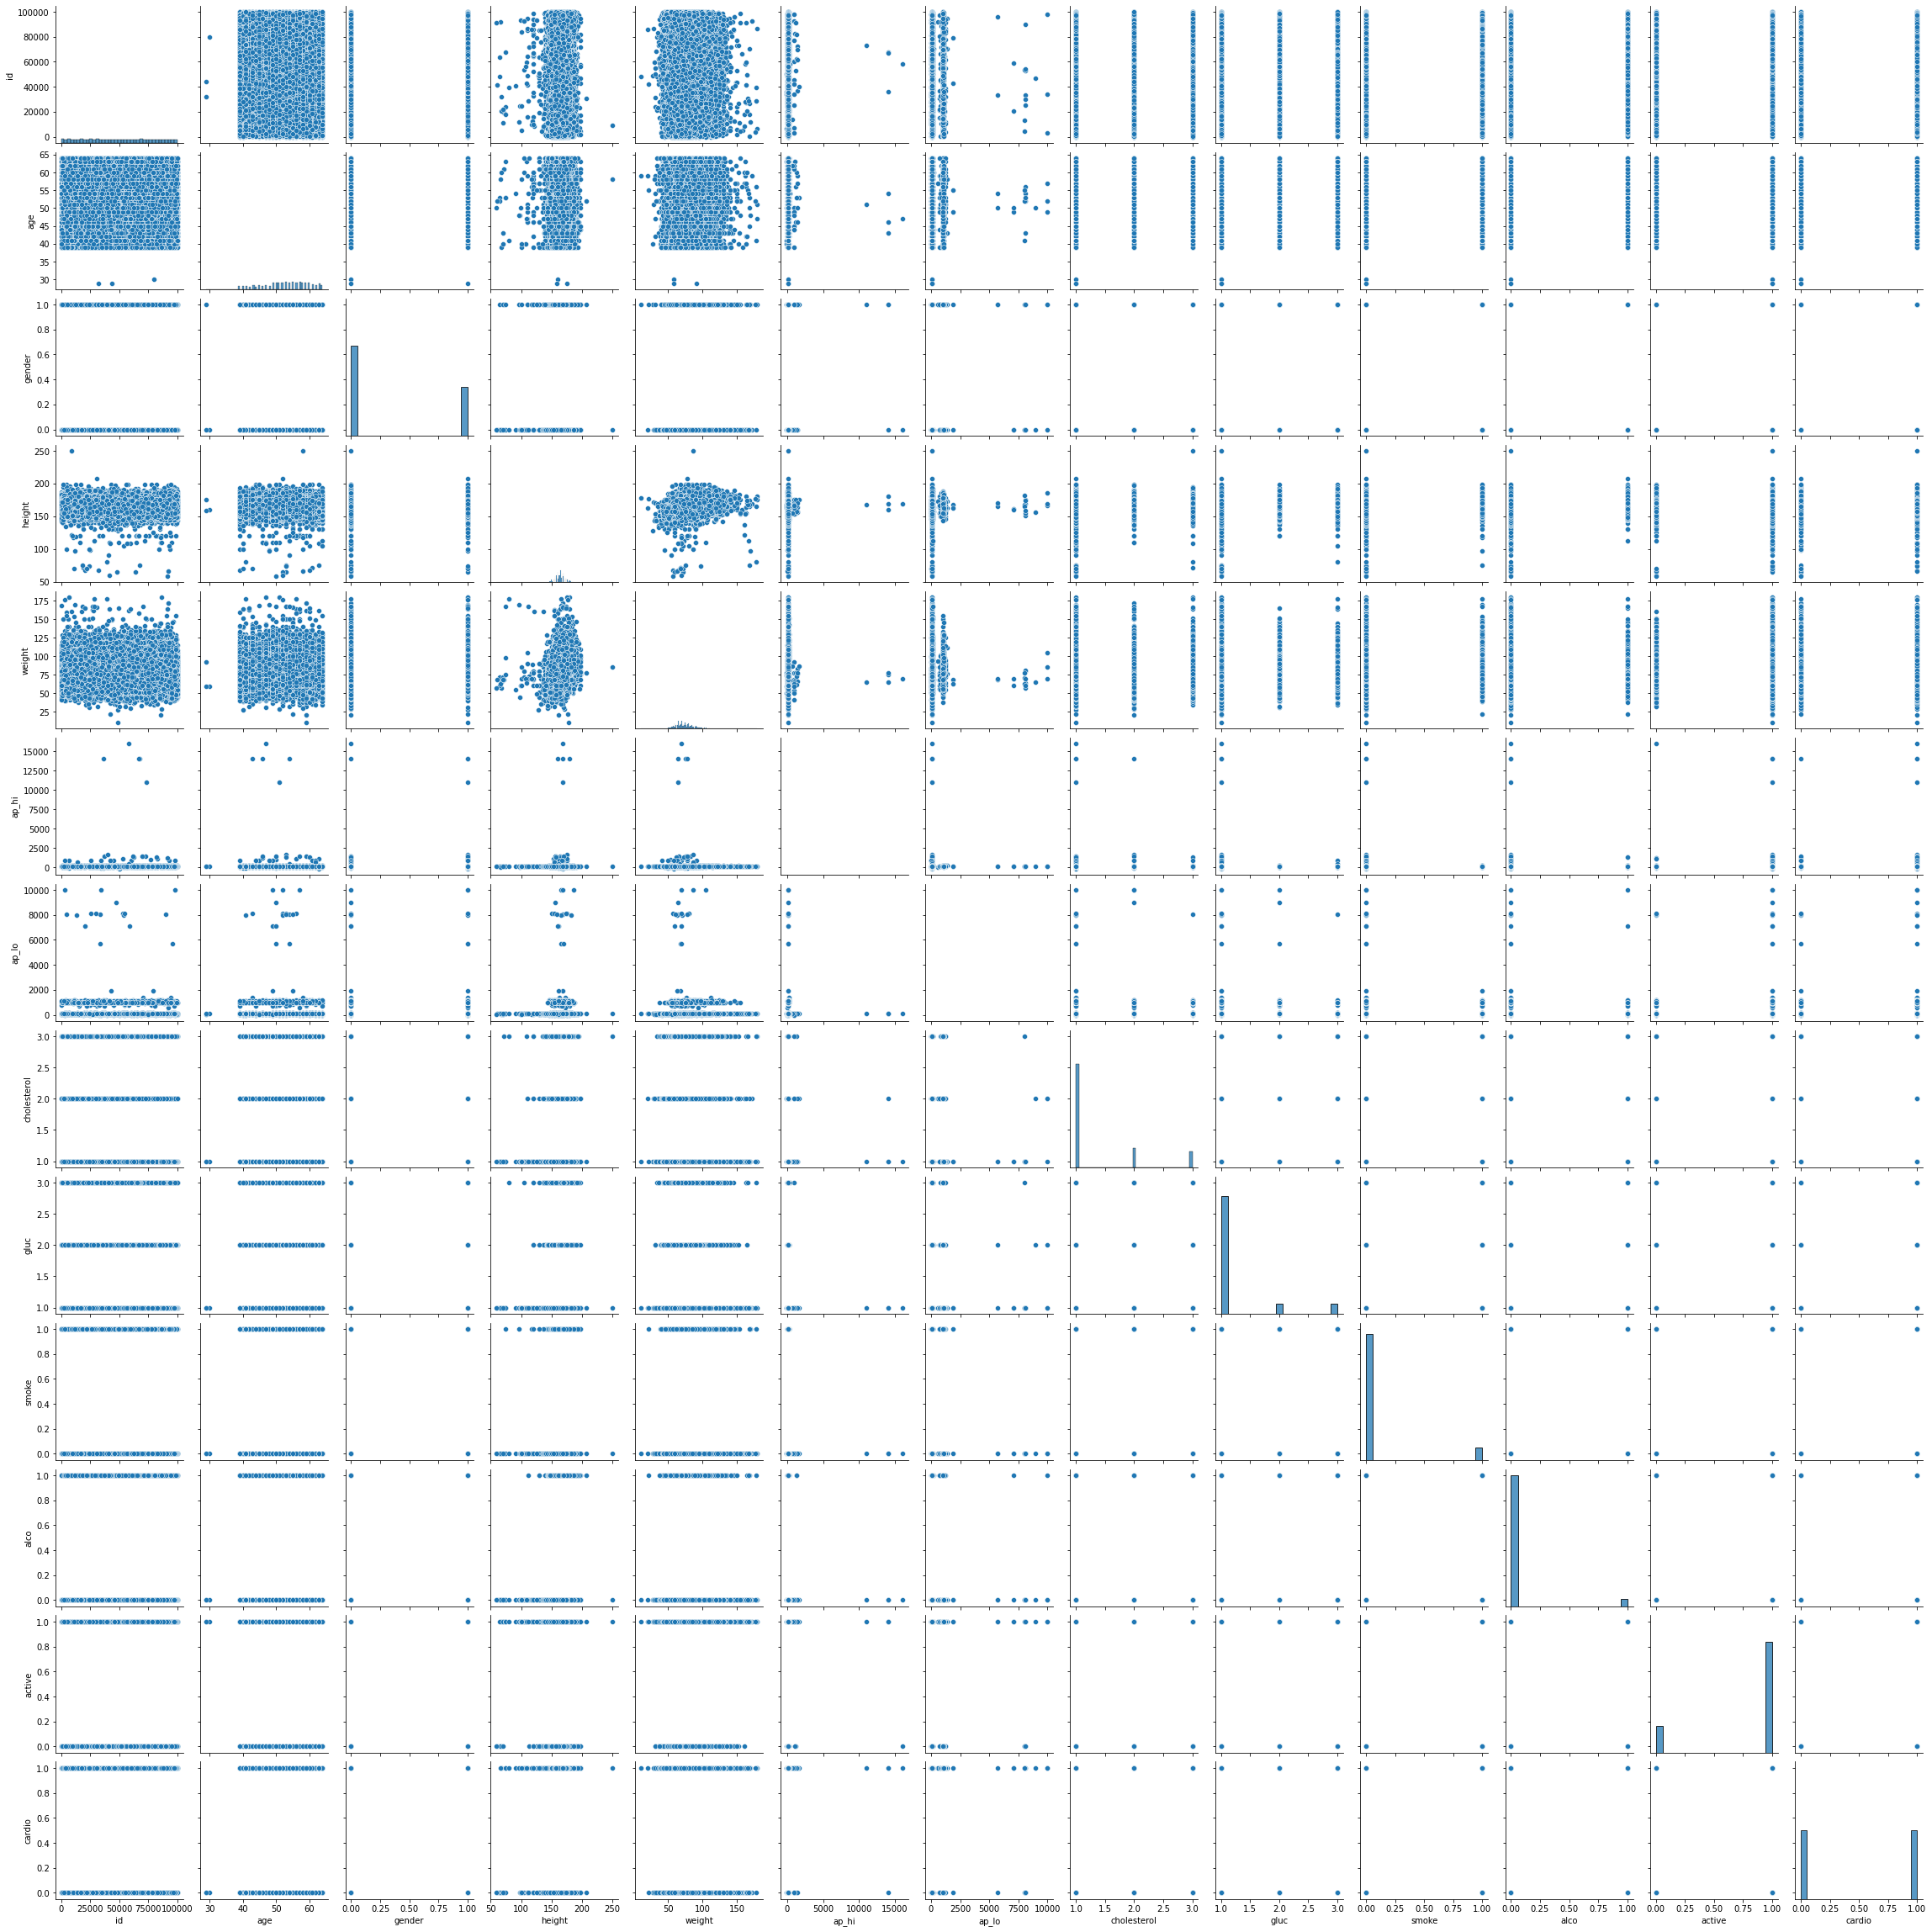

In [65]:
sns.pairplot(train)
plt.show()

In [11]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(train)


In [12]:
print(scaled)

[[0.85634569 0.94285714 0.         ... 0.         1.         1.        ]
 [0.18610558 0.37142857 1.         ... 0.         0.         0.        ]
 [0.18841565 0.94285714 1.         ... 0.         1.         1.        ]
 ...
 [0.60883827 0.91428571 1.         ... 0.         1.         0.        ]
 [0.62243867 0.6        0.         ... 0.         1.         0.        ]
 [0.97498925 0.74285714 1.         ... 0.         1.         1.        ]]


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import std


train_data = train.values
# separate into input and output columns
X, y = train_data[:, :-1], train_data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.634 (0.007)


##### Random Forest Importance Measures:

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

labels = train.columns[1:]
forest = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importance_
indices = np.argsort(importances)[::-1]
for f in range (X_train.shape[1]):
    print('%2d) %-*s %f' % (f+1, 30, labels[f], importances[indices[f]]))

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_importance_'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.datasets import make_regression

feature = train.columns

X, y = make_regression(n_samples=1000, n_features=11, n_informative=5, random_state=1)

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range (train.shape[1]):
    print('%2d) %-*s %f' % (f+1, 30, feature[f-1], importances[indices[f-2]]))

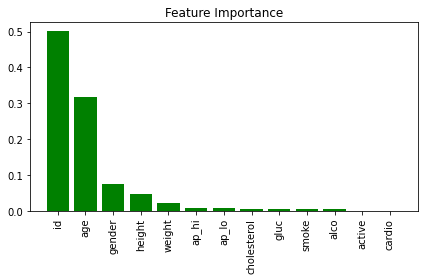

In [59]:
plt.title('Feature Importance')
plt.bar(range(train.shape[1]-2), importances[indices], color = 'green', align = 'center')

plt.xticks(range(train.shape[1]), feature, rotation = 90)
plt.xlim([-1, train.shape[1]])
plt.tight_layout()
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
         n_estimators=100,
         n_jobs=-1,
         min_samples_leaf = 1,
         oob_score=True,
         random_state = 42)
rf.fit(X_train, y_train)

print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.722


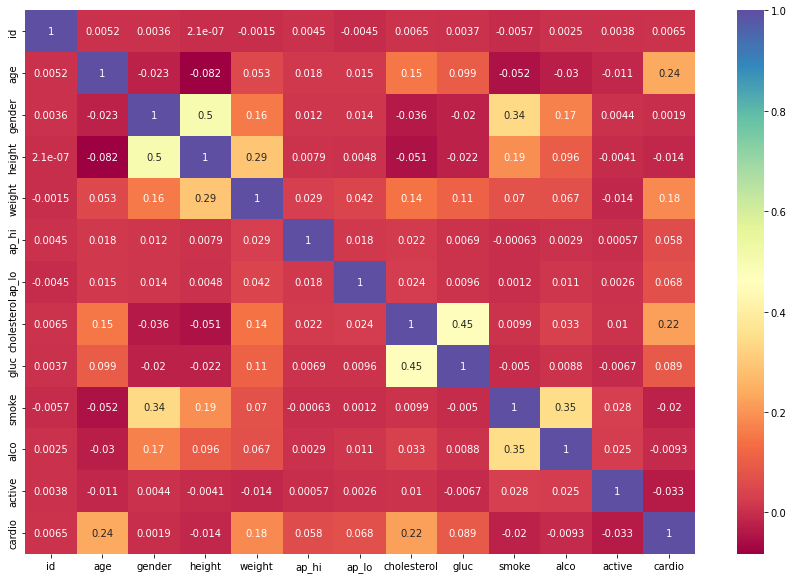

In [64]:
plt.figure(figsize =(15, 10))
ax = sns.heatmap(train.corr(), annot=True, cmap='Spectral')
plt.show()